In [143]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [144]:
df = pd.read_csv("C:/Data science#projects/train_u6lujuX_CVtuZ9i (1).csv")

In [145]:
df.shape

(614, 13)

In [146]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [147]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Pre-processing 

## Categorical Variable

In [149]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

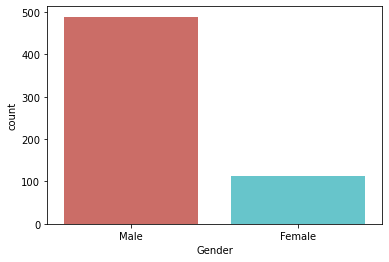

In [150]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [151]:
cath_variable= ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area']

les caratéristiques de la variable Gender
Male      489
Female    112
Name: Gender, dtype: int64


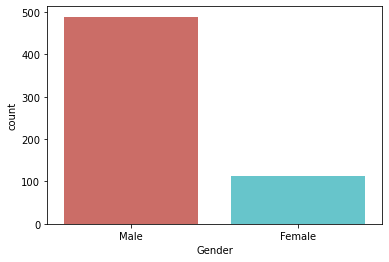

les caratéristiques de la variable Married
Yes    398
No     213
Name: Married, dtype: int64


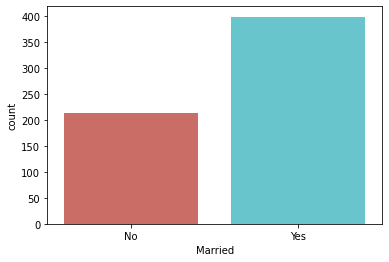

les caratéristiques de la variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


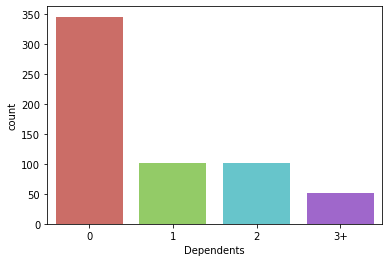

les caratéristiques de la variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


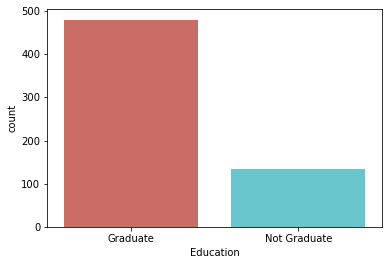

les caratéristiques de la variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


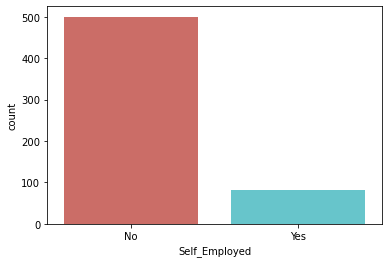

les caratéristiques de la variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


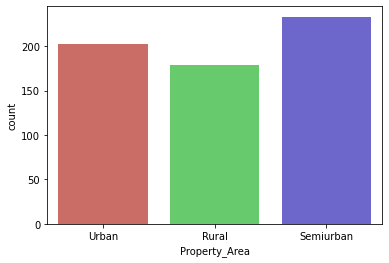

In [152]:
for var in cath_variable :
    print('les caratéristiques de la variable',var)
    print(df[var].value_counts())
    sns.countplot(x=var, data=df, palette="hls")
    plt.show()
    countNull = len(df[df.Gender.isnull()])

   

##  Loan Status (target)

In [153]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

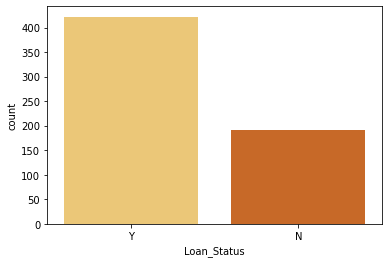

In [154]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [155]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


## numerical variables 

In [156]:
numeric_var=['ApplicantIncome', 'CoapplicantIncome','LoanAmount']
#'Loan_Amount_Term','Credit_History'

In [157]:
numeric_var

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [158]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

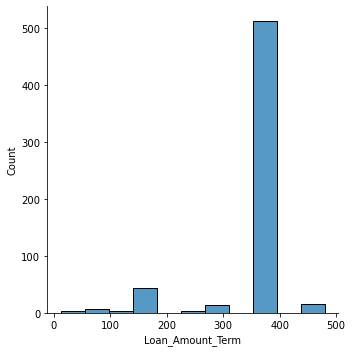

In [159]:
sns.displot(x="Loan_Amount_Term", data=df, palette="YlOrBr")
plt.show()

In [160]:
## normalization of the variable "Loan_Amount_Term"

In [161]:
df['Loan_Amount_Term_sqrt']= np.sqrt(df['Loan_Amount_Term'])

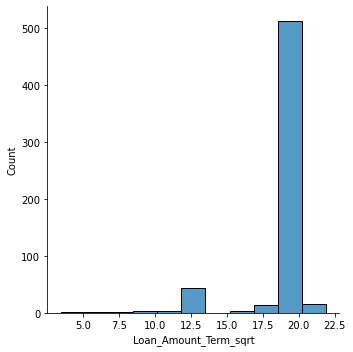

In [162]:
sns.displot(x="Loan_Amount_Term_sqrt", data=df, palette="YlOrBr")
plt.show()

In [163]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

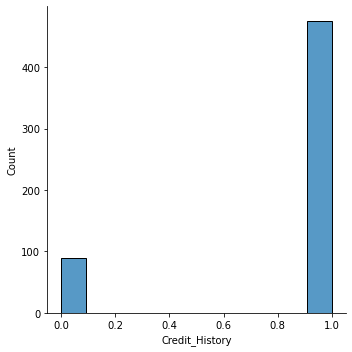

In [164]:
sns.displot(x="Credit_History", data=df, palette="YlOrBr")
plt.show()

ditribution of ApplicantIncome


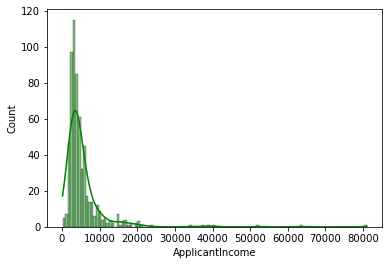

ditribution of CoapplicantIncome


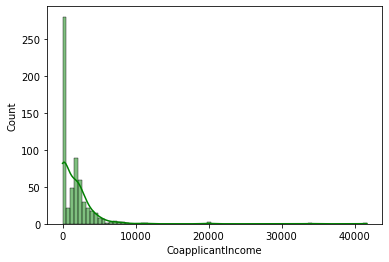

ditribution of LoanAmount


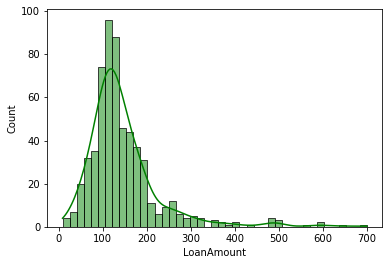

In [165]:
for col in numeric_var:
    print('ditribution of', col )
    sns.histplot(data= df ,x= col,  kde= True, color='green')
    plt.show()

ditribution of ApplicantIncome


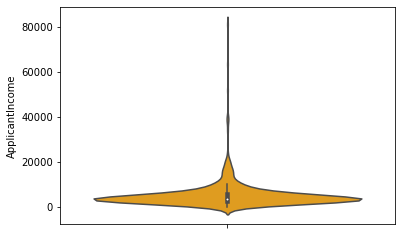

ditribution of CoapplicantIncome


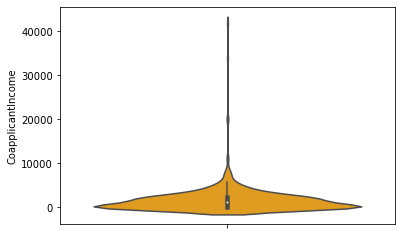

ditribution of LoanAmount


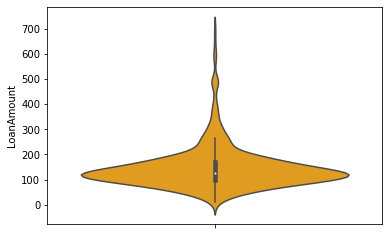

In [166]:
for col in numeric_var:
    print('ditribution of', col )
    sns.violinplot(data=df, y= col, color='orange')
    plt.show()

In [167]:
# df['totaleIncome']= df['ApplicantIncome']+  df['CoapplicantIncome']


In [168]:
# rassembler les variables 'ApplicantIncome' et 'CoapplicantIncome' en une seule variable 

In [169]:
df['totaleIncome']= df['ApplicantIncome']+  df['CoapplicantIncome']

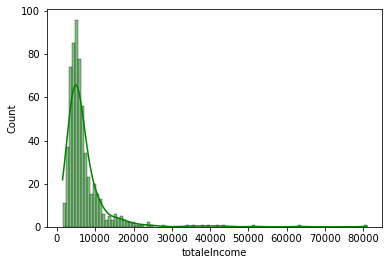

In [170]:
sns.histplot(data= df ,x= 'totaleIncome',  kde= True, color='green')
plt.show()

In [171]:
## normalization of the variable 'totaleIncome'

In [172]:
df['totaleIncome_log']= np.log(df['totaleIncome'])

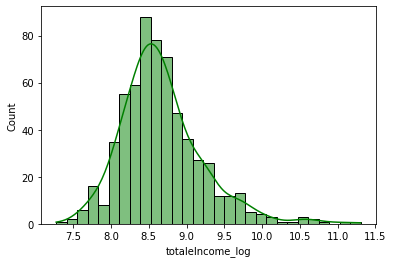

In [173]:
sns.histplot(data= df ,x= 'totaleIncome_log',  kde= True, color='green')
plt.show()

In [174]:
df['totaleIncome_sqrt']= np.sqrt(df['totaleIncome'])

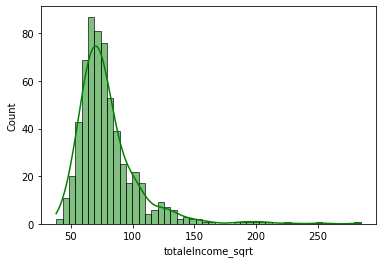

In [175]:
sns.histplot(data= df ,x= 'totaleIncome_sqrt',  kde= True, color='green')
plt.show()

In [176]:
## so the normalisation with the function log in this varialble it's better then the function sqrt 

In [177]:
df=df.drop('totaleIncome_sqrt', axis=1)

In [178]:
## we make the same thing for the variable LoanAmount 

In [179]:
df['LoanAmount_log']= np.log(df['LoanAmount'])

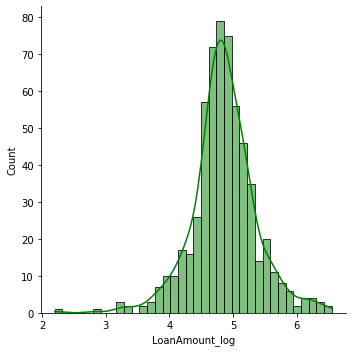

In [180]:
sns.displot(data= df ,x= 'LoanAmount_log',  kde= True, color='green')
plt.show()

# Correlation Matrix

In [181]:
cols=['LoanAmount','totaleIncome','ApplicantIncome' ,'CoapplicantIncome']
df=df.drop(columns= cols, axis=1)

<AxesSubplot:>

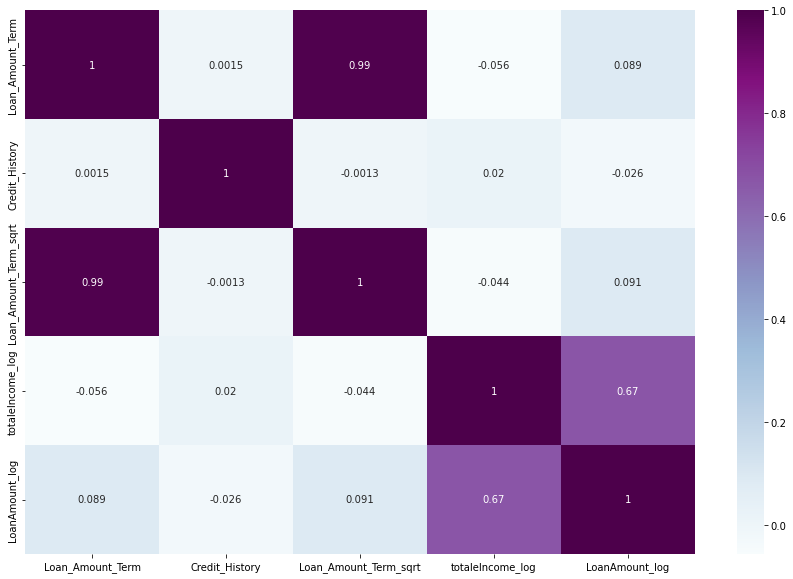

In [182]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [183]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Amount_Term_sqrt', 'totaleIncome_log',
       'LoanAmount_log'],
      dtype='object')

## Remove Outliers & Infinite values

In [184]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [185]:
# this step is not efficace, we lost a great number in our data 

# Label Encoding

In [186]:

cols = ['Gender', "Married", "Education", 'Self_Employed', "Property_Area", "Loan_Status", "Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [187]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_sqrt,totaleIncome_log,LoanAmount_log
0,LP001002,1,0,0,0,0,360.0,1.0,2,1,18.973666,8.674026,NaN
1,LP001003,1,1,1,0,0,360.0,1.0,0,0,18.973666,8.714568,4.852030
2,LP001005,1,1,0,0,1,360.0,1.0,2,1,18.973666,8.006368,4.189655
3,LP001006,1,1,0,1,0,360.0,1.0,2,1,18.973666,8.505323,4.787492
4,LP001008,1,0,0,0,0,360.0,1.0,2,1,18.973666,8.699515,4.948760


# Data imputation  

In [188]:
df.isna().sum()/df.shape[0]

Loan_ID                  0.000000
Gender                   0.000000
Married                  0.000000
Dependents               0.000000
Education                0.000000
Self_Employed            0.000000
Loan_Amount_Term         0.022801
Credit_History           0.081433
Property_Area            0.000000
Loan_Status              0.000000
Loan_Amount_Term_sqrt    0.022801
totaleIncome_log         0.000000
LoanAmount_log           0.035831
dtype: float64

In [189]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Loan_Amount_Term_sqrt', 'totaleIncome_log',
       'LoanAmount_log'],
      dtype='object')

In [190]:
df.shape

(614, 13)

In [191]:
## cathegorical variables 

In [192]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [193]:
## Numerical variables 

In [194]:
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(),inplace=True)
df['Loan_Amount_Term_sqrt'].fillna(df['Loan_Amount_Term_sqrt'].mean(),inplace=True)
df['totaleIncome_log'].fillna(df['totaleIncome_log'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)



In [195]:
df.isna().sum()/df.shape[0]

Loan_ID                  0.0
Gender                   0.0
Married                  0.0
Dependents               0.0
Education                0.0
Self_Employed            0.0
Loan_Amount_Term         0.0
Credit_History           0.0
Property_Area            0.0
Loan_Status              0.0
Loan_Amount_Term_sqrt    0.0
totaleIncome_log         0.0
LoanAmount_log           0.0
dtype: float64

In [196]:
df= df.drop(['Loan_Amount_Term','Loan_ID'], axis=1)

# Spliting the data for training and testing 

In [197]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [198]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model training  

## LogisticRegression 

In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [201]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:

## DisiosonTreeClassifier  

In [203]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.42857142857143
Cross validation is 69.0537118485939


## Random Forest:

In [204]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 78.5019325603092


# Hyperparameter tuning

In [205]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)

In [206]:
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 80.29588164734108
